**Краткое описание задачи**

Анализ сервиса аренды самокатов GoFast
Вы аналитик популярного сервиса аренды самокатов GoFast. Необходимо проанализируйте данные и проверить некоторые гипотезы (представлены нижев в самом проекте), которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

*без подписки:* 

абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;

*с подпиской Ultra:*

абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

**Описание данных**

***Пользователи — users_go.csv***
user_id — уникальный идентификатор пользователя
name — имя пользователя
age — возраст
city — город
subscription_type — тип подписки (free, ultra)

***Поeздки — rides_go.csv***
user_id — уникальный идентификатор пользователя
distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date — дата совершения поездки
Подписки — subscriptions_go.csv

***subscription_type — тип подписки***
minute_price — стоимость одной минуты поездки по данной подписке
start_ride_price — стоимость начала поездки
subscription_fee — стоимость ежемесячного платежа

In [1]:
import pandas as pd

#### Шаг 1. Загрузка данных

In [2]:
#1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
#1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.
print('Таблица users_go: \n', display(users_go), '\n\n\n')
print('Таблица rides_go: \n', display(rides_go), '\n\n\n')
print('Таблица subscriptions_go: \n', display(subscriptions_go))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


Таблица users_go: 
 None 





,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


Таблица rides_go: 
 None 





,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Таблица subscriptions_go: 
 None


**Общий вывод по пункту 1**

Считаны CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы
Выведены первые строки каждого набора данных. Изучена общаю информацию о каждом датафрейме
Данных достаточно, можно приступать к предобработке

#### Шаг 2. Предобработка данных

In [3]:
#Общая информация о каждом датафрейме
print(users_go.info())
print ('------------------')
print(rides_go.info())
print ('------------------')
print(subscriptions_go.info())
print ('------------------')
#2.1 Приведите столбец date к типу даты pandas
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

#2.2 Создайте новый столбец с номером месяца на основе столбца date.
rides_go['month'] = rides_go['date'].dt.month

#2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.
#users_go.duplicated().sum()
users_go.drop_duplicates(inplace=True)
print ('Количество дублей в таблице users_go - ', users_go.duplicated().sum(), '\n')
print ('Количество дублей в таблице rides_go - ', rides_go.duplicated().sum(), '\n')
#Для таблицы subscriptions_go не требуется, т.к. всего 2 строки с типом подписки 
print ('Количество пустых значений в таблице users_go:\n', users_go.isnull().sum(), '\n')
print ('Количество пустых значений в таблице rides_go: \n', rides_go.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries,

**Выводы**
- в таблицах отсутствуют явные пропуски 
- только в таблице users_go есть явные дубликаты (31), но их количество незанчительно 
- все наименования столбцов соответствуют "Хорошему стилю" 
***На основании полученного описания, можно сделать вывод, что даннхы достаточно для проведения исследования*** 

#### Шаг 3. Исследовательский анализ данных

           user_id          age
count  1534.000000  1534.000000
mean    767.500000    24.903520
std     442.971971     4.572367
min       1.000000    12.000000
25%     384.250000    22.000000
50%     767.500000    25.000000
75%    1150.750000    28.000000
max    1534.000000    43.000000


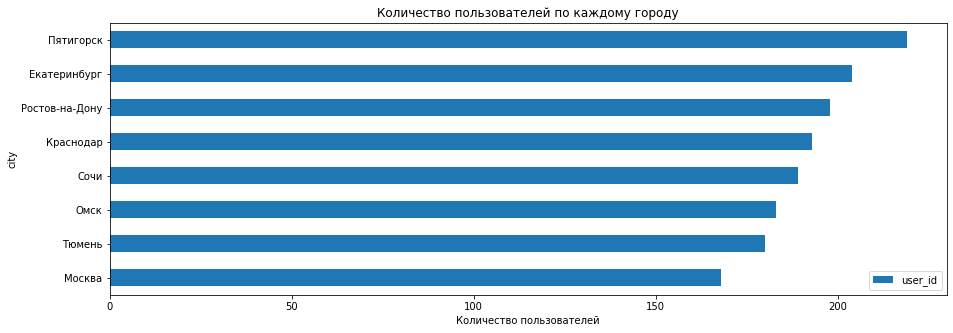

Количество пользователей по каждому городу 
                 user_id
city                   
Пятигорск           219
Екатеринбург        204
Ростов-на-Дону      198
Краснодар           193
Сочи                189
Омск                183
Тюмень              180
Москва              168


In [4]:
#Опишите и визуализируйте общую информацию о пользователях и поездках:
import matplotlib.pyplot as plt
print (users_go.describe())
#3.1 частота встречаемости городов
(
    users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
    .plot(kind='barh', figsize=(15, 5))
)
plt.title('Количество пользователей по каждому городу')
plt.xlabel('Количество пользователей')
plt.show()
print ('Количество пользователей по каждому городу \n', users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False))


**Вывод по пункту 3.1**
    - показана и визуализирована информация по количеству пользователей в городах 
    - в основном больше пользователей в южных городах, исключение г. Екатеринбург 

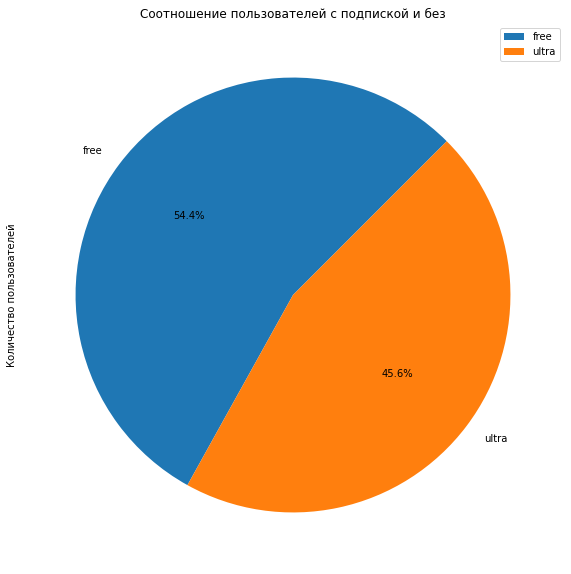

In [5]:
#3.2 соотношение пользователей с подпиской и без подписки
(
    users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot.pie(y='user_id', figsize=(15 ,10),  label='Количество пользователей', 
    autopct='%1.1f%%', startangle=45,
    title='Соотношение пользователей с подпиской и без')

)
plt.show()

**Вывод по пункту 3.2:**
- Пользователей с подпиской - 45.6%
- Пользователей без подписки - 54.4%

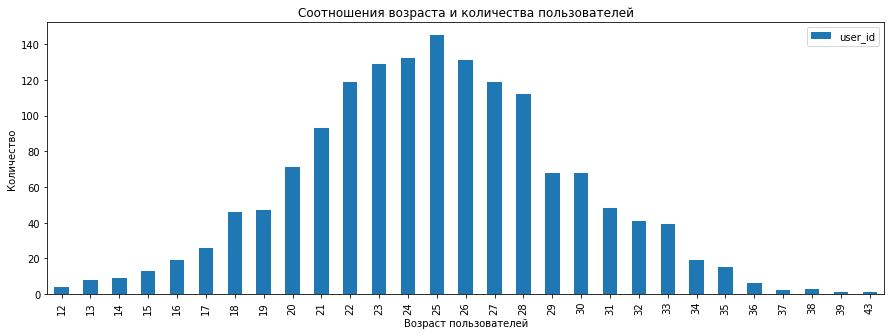

Соотношения возраста и количества пользователей: 
      user_id
age         
12         4
13         8
14         9
15        13
16        19
17        26
18        46
19        47
20        71
21        93
22       119
23       129
24       132
25       145
26       131
27       119
28       112
29        68
30        68
31        48
32        41
33        39
34        19
35        15
36         6
37         2
38         3
39         1
43         1


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [6]:
#3.3 возраст пользователей
(
    users_go.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True)
    .plot(kind='bar', figsize=(15, 5))
)
plt.title('Соотношения возраста и количества пользователей')
plt.xlabel('Возраст пользователей')
plt.ylabel('Количество')
plt.show()
print ('Соотношения возраста и количества пользователей: \n', users_go.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True))

users_go['age'].describe()

**Вывод по пункту 3.3** 
- мы получили результат, что в основном это пользователи от 22 до 28 лет, наибольшее число пользователей возрастом 25 лет  

            user_id      distance      duration         month
count  18068.000000  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011      6.486772
std      434.734317   1116.831209      6.091051      3.437410
min        1.000000      0.855683      0.500000      1.000000
25%      487.000000   2543.226360     13.597563      4.000000
50%      889.000000   3133.609994     17.678395      6.000000
75%     1213.250000   3776.222735     21.724800      9.000000
max     1534.000000   7211.007745     40.823963     12.000000 

Информация по дистанции 
 count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


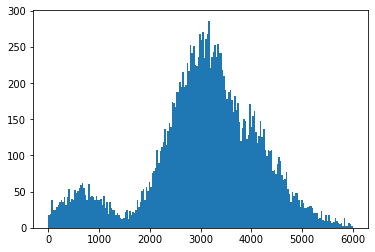

In [7]:
#3.4 расстояние, которое пользователь преодолел за одну поездку;
print (rides_go.describe(), '\n')
plt.hist(rides_go['distance'], bins=200, range=(1,6000))
print ('Информация по дистанции \n', rides_go['distance'].describe())

***Выводы по пункту 3.4**
В основном пользователи проезжают от 2543.226360 м. (1-й квартиль) до 3776.222735 м. (3-й квартиль), со средним значением 3133.609994 м. (медиана). 
Также стоит заметить, что есть небольшой всплеск, когда полдьзователи проезжали от 600 до 800 метров 


count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


(array([  33.,  150.,  328.,  564., 1107., 1665., 2071., 2214., 2388.,
        2241., 1773., 1245.,  895.,  559.,  361.,  233.,  118.,   21.,
           4.,    3.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.,
        27., 29., 31., 33., 35., 37., 39., 41.]),
 <BarContainer object of 20 artists>)

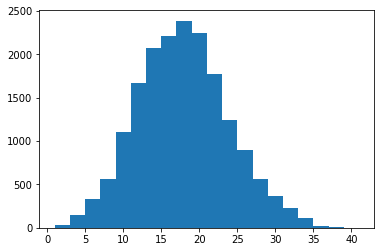

In [8]:
#3.5 продолжительность поездок
print (rides_go['duration'].describe())
plt.hist(rides_go['duration'], bins=20, range=(1,41))

***Выводы по пункту 3.5***
В основном пользователи едут от 13 минут (1-й квартиль) до 21 минуты (3-й квартиль), со средним значением 18 минут (медиана).

**Общие выводы по пункту 3**
- Показана и визуализирована информация по количеству пользователей в городах (в основном больше пользователей в южных городах, исключение г. Екатеринбург) 
- Соотношение пользователей с подпиской и без - 45.6% / 54.4%
- В основном пользователи от 18 до 33 лет, наибольшее число пользователей возрастом 25 лет 
- В основном пользователи проезжают от 2543.226360 м. (1-й квартиль) до 3776.222735 м. (3-й квартиль), со средним значением 3133.609994 м. (медиана). Также стоит заметить, что есть небольшой всплеск, когда полдьзователи проезжали от 600 до 800 метров 
- В основном пользователи едут от 13 минут (1-й квартиль) до 21 минуты (3-й квартиль), со средним значением 18 минут (медиана).



#### Шаг 4. Объединение данных

In [9]:
#4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge()
data = users_go.merge(rides_go)
data = data.merge(subscriptions_go)
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [10]:
#4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

#4.2.1 C данными о пользователях без подписки
free_data = data.query("`subscription_type` == 'free'")
print (free_data)

#4.2.2 C данными о пользователях с подпиской.
ultra_data = data.query("`subscription_type` == 'ultra'")
print (ultra_data)


       user_id     name  age       city subscription_type     distance  \
6500       700    Айдар   22       Омск              free  2515.690719   
6501       700    Айдар   22       Омск              free   846.932642   
6502       700    Айдар   22       Омск              free  4004.434142   
6503       700    Айдар   22       Омск              free  1205.911290   
6504       700    Айдар   22       Омск              free  3047.379435   
...        ...      ...  ...        ...               ...          ...   
18063     1534  Альберт   25  Краснодар              free  3781.098080   
18064     1534  Альберт   25  Краснодар              free  2840.423057   
18065     1534  Альберт   25  Краснодар              free  3826.185507   
18066     1534  Альберт   25  Краснодар              free  2902.308661   
18067     1534  Альберт   25  Краснодар              free  2371.711192   

        duration       date  month  minute_price  start_ride_price  \
6500   14.944286 2021-01-02      1       

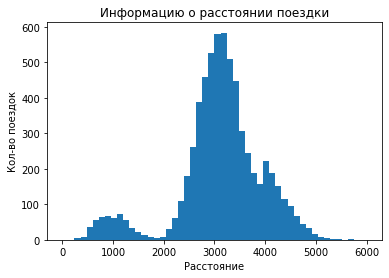

<Figure size 720x720 with 0 Axes>

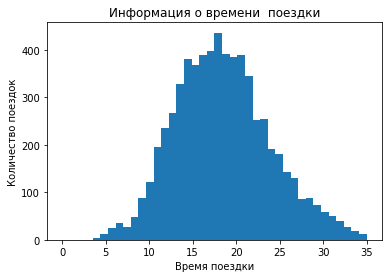

<Figure size 720x720 with 0 Axes>

In [11]:
#4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий

#4.3.1. Платная подписка

#Расстояние 
plt.hist(ultra_data['distance'], bins=50, range = (1, 6000))
plt.title('Информацию о расстоянии поездки')
plt.xlabel('Расстояние')
plt.ylabel('Кол-во поездок')
plt.figure(figsize=(10,10))
plt.show()

#Время
plt.hist(ultra_data['duration'], bins=40, range = (0, 35))
plt.title('Информация о времени  поездки')
plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.figure(figsize=(10,10))
plt.show()

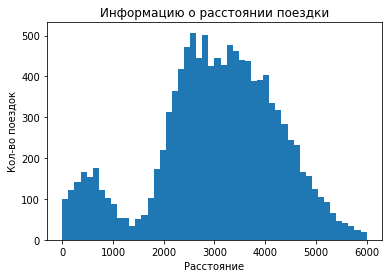

<Figure size 720x720 with 0 Axes>

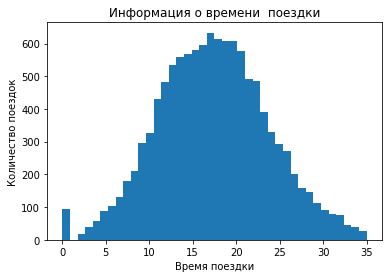

<Figure size 720x720 with 0 Axes>

In [12]:
#4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий

#4.3.1. Без подписки 

#Расстояние 
plt.hist(free_data['distance'], bins=50, range = (1, 6000))
plt.title('Информацию о расстоянии поездки')
plt.xlabel('Расстояние')
plt.ylabel('Кол-во поездок')
plt.figure(figsize=(10,10))
plt.show()

#Время
plt.hist(free_data['duration'], bins=40, range = (0, 35))
plt.title('Информация о времени  поездки')
plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.figure(figsize=(10,10))
plt.show()

**Общие выводы по пункту 4**
- Платный тариф - В основном время находится в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км. Также стоит отметить, при присутствует небольшой всплеск на поезщдки около 1000 метров. 
- Без подписки - В основном время находится в промежуток от 10 до 25 минут.
- Исходя из вышеизложенного, делаем вывод, что пользователи без подписки в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

#### Шаг 5. Подсчёт выручки

In [13]:
import numpy as np

#Продолжительность каждой поездки должна быть округлена с помощью метода «потолок» библиотеки numpy — np.ceil():
data['duration'] = np.ceil(data['duration'])

#5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
users_data = data.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=('count', 'sum'))

users_data.columns = [
    'count', 'distance', 
    'count2', 'duration', 
    'count3', 'minute_price',
    'count4', 'start_ride_price', 
    'count5', 'subscription_fee'
]
users_data = users_data.drop(['count2', 'count3', 'count4', 'count5'], axis=1)
users_data['start_ride_price'] = users_data['start_ride_price'] / users_data['count']
users_data['minute_price'] = users_data['minute_price'] / users_data['count']
users_data['subscription_fee'] = users_data['subscription_fee'] / users_data['count']
print (users_data.head())

#5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.
users_data['total'] = (
    (users_data['start_ride_price'] * users_data['count']) 
    + (users_data['minute_price'] * users_data['duration']) 
    + users_data['subscription_fee'])
    
users_data.head(10)
  

               count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0           6.0               0.0   
        4          1   754.159807       7.0           6.0               0.0   
        8          2  6723.470560      46.0           6.0               0.0   
        10         2  5809.911100      32.0           6.0               0.0   
        11         3  7003.499363      56.0           6.0               0.0   

               subscription_fee  
user_id month                    
1       1                 199.0  
        4                 199.0  
        8                 199.0  
        10                199.0  
        11                199.0  


count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0           6.0               0.0   
        4          1    754.159807       7.0           6.0               0.0   
        8          2   6723.470560      46.0           6.0               0.0   
        10         2   5809.911100      32.0           6.0               0.0   
        11         3   7003.499363      56.0           6.0               0.0   
        12         2   6751.629942      28.0           6.0               0.0   
2       3          3  10187.723006      63.0           6.0               0.0   
        4          2   6164.381824      40.0           6.0               0.0   
        6          1   3255.338202      14.0           6.0               0.0   
        7          2   6780.722964      48.0           6.0               0.0   

               subscription_fee  total  
user_id month                           
1       1                 199.0  451.0  
        4                 199.0  241.0  
        8                 199.0  475.0  
        10                199.0  391.0  
        11                199.0  535.0  
        12                199.0  367.0  
2       3                 199.0  577.0  
        4                 199.0  439.0  
        6                 199.0  283.0  
        7                 199.0  487.0

***Общий вывод по пункту 5***
- Вывели суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. 
- Добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

In [14]:
from scipy import stats as st
#6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки?
#Фомируем гипотезу: 
#H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free
#H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free
print('Тратят ли пользователи с подпиской больше времени на поездки?')
results = st.ttest_ind(
    ultra_data['duration'], 
    free_data['duration'], 
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу \n')
else:
    print('Не получилось отвергнуть нулевую гипотезу \n')
    
    
#6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает метров? Проверьте гипотезу и сделайте выводы.
#Формируем гипотезу
#Н_0: Среднее расстояние поездок с подпиской ultra = оптимальному расстоянию в 3130 метров
#Н_1: Среднее расстояние поездок с подпиской ultra > оптимального в 3130 метров
print('Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, оптимальное с точки зрения износа самоката?')
optimal_distance = 3130
alpha = 0.05

results = st.ttest_1samp(
    ultra_data['distance'], 
    optimal_distance,
    alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу \n')
else:
    print('Не получилось отвергнуть нулевую гипотезу \n')
    
    
#6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
#Формируем гипотезу

#Н_0: Помесячная средняя выручка от пользователей с подпиской = помесячной средней выручке от пользователей без подписки
#Н_1: Помесячная средняя выручка от пользователей с подпиской > помесячной средней выручки от пользователей без подписки
print('Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?')
results = st.ttest_ind(
    users_data.loc[users_data['subscription_fee'] > 0, 'total'], 
    users_data.loc[users_data['subscription_fee'] == 0, 'total'], 
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу \n')
else:
    print('Не получилось отвергнуть нулевую гипотезу \n')
    

Тратят ли пользователи с подпиской больше времени на поездки?
1.2804098316645618e-34
Отвергаем нулевую гипотезу 

Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, оптимальное с точки зрения износа самоката?
0.9195368847849785
Не получилось отвергнуть нулевую гипотезу 

Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
1.8850394384715216e-31
Отвергаем нулевую гипотезу 



***6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?*** 
Необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок, т.к. теоретически это две зависимые выборки
Пример, какую гипотезу можно выдвинуть x1 и x2 - средние значения количество обращений в техподдержку до и после изменения):
H_0 : x1 = x2
H_1 : x1 > x2
Можно применить метод scipy.stats.ttest_rel() при сравнении

**Общий вывод по пункту 6**
- Можем утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 % (Нулевая гипотеза отвергнута)
- Можем утверждать, что среднее расстояние поездки, пользователей с подпиской, не превышает оптимальное расстоянием в 3130 метров, при установленном уровне значимости в 5 % (Не получилось отвергнуть нулевую гипотезу)
- Можем утверждать, что средняя месячная выручка от пользователей с подпиской, больше средней месячной выручки от пользователей без подписки, при установленном уровне значимости в 5 % (Нулевая гипотеза отвергнута). А значит сервису необходимо развивать направление с подпиской и привлекать пользователей, кто часто пользуется, но не приобрел подписку, это сделать. 
- Необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок, т.к. теоретически это две зависимые выборки. Пример, какую гипотезу можно выдвинуть x1 и x2 - средние значения количество обращений в техподдержку до и после изменения): H_0 : x1 = x2 и H_1 : x1 > x2. Можно применить метод scipy.stats.ttest_rel() при сравнении. 

**Общий вывод по проекту**

***В ходе работы с популярным сервисос аренды самокатов GoFast были проделаны сдедующие работы и представленые выводы*** 

****Часть 1****
- Считаны CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы
- Выведены первые строки каждого набора данных. Изучена общаю информацию о каждом датафрейме

****Часть 2****
- Проверено и удалены дубликаты в датафрейме users_go
- Приведен столбец date к типу даты pandas в датафрейме users_go
- Создали столбец month с номером месяца из date в датафрейме users_go
- В датафреймах riders_go и subscriptions_go изменений не проводилось 

****Часть 3****
- Показана и визуализирована информация по количеству пользователей в городах (в основном больше пользователей в южных городах, исключение г. Екатеринбург)
- Соотношение пользователей с подпиской и без - 45.6% / 54.4%
- В основном пользователи от 22 до 28 лет, наибольшее число пользователей возрастом 25 лет
- В основном пользователи проезжают от 2543 м. (1-й квартиль) до 3776 м. (3-й квартиль), со средним значением 3133 м. (медиана). Также стоит заметить, что есть небольшой всплеск, когда полдьзователи проезжали от 600 до 800 метров
- В основном пользователи едут от 13 минут (1-й квартиль) до 21 минуты (3-й квартиль), со средним значением 18 минут (медиана).

****Часть 4****
- Платный тариф - В основном время находится в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км. Также стоит отметить, при присутствует небольшой всплеск на поезщдки около 1000 метров.
- Без подписки - В основном время находится в промежуток от 10 до 25 минут.
- Исходя из вышеизложенного, делаем вывод, что пользователи без подписки в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

****Часть 5****
- Вывели суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Добавили столбец с помесячной выручкой, которую принес каждый пользователь.

****Часть 6****
- Можем утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 %
- Можем утверждать, что среднее расстояние поездки, пользователей с подпиской, не превышает оптимальное расстоянием в 3130 метров, при установленном уровне значимости в 5 % 
- Можем утверждать, что средняя месячная выручка от пользователей с подпиской, больше средней месячной выручки от пользователей без подписки, при установленном уровне значимости в 5 %. А значит сервису необходимо развивать направление с подпиской и привлекать пользователей, кто часто пользуется, но не приобрел подписку, это сделать. 
- Представлено возможное решении кейса, а именно то, что необходимо использовать гипотезу о равенстве средних для зависимых (парных) выборок, т.к. теоретически это две зависимые выборки. Пример, какую гипотезу можно выдвинуть x1 и x2 - средние значения количество обращений в техподдержку до и после изменения): H_0 : x1 = x2 и H_1 : x1 > x2. Можно применить метод scipy.stats.ttest_rel() при сравнении. 